# 파이썬으로 배우는 기계학습
# Machine Learning with Python
**************

# 제 7-2 강: 순방향 신경망 실습$^{feed-forward \ neural \ network \ practice}$

## 학습 목표
- 예제를 통해 순방향 신경망을 깊이 있게 이해한다

## 학습 내용
- MNIST 자료 이해 하기
- 다층 신경망 설계 하기
- 순방향 신경망  신호처리
- 순방향 신경망 예제 구현 하기 

In [1]:
import numpy as np
import imp
import joy
imp.reload(joy)

<module 'joy' from 'E:\\01_python\\11_study\\17_KMOOC_한동대_파이썬으로 배우는 기계학습 입문\\ipynb\\joy.py'>

## 1. 다층 신경망의 신호처리

이전 강의에서 여러분들은 다층 신경망에서 신호가 어떻게 처리되는지 직접 계산은 해보았습니다.
하지만, 아직 실감이 가지 않을 수도 있습니다. 꿈의 함수 제조기가 겨우 행렬의 곱셈과 덧셈 몇 번만으로 끝나는 것인지 의심스러울 수도 있습니다. 왜냐하면 여러분들이 이전 강의에서 다룬 내용은 신경망에서 신호가 어떻게 처리 되는지를 확인 하기 위한 예제에서 그쳤기 때문입니다.

우리는 이번 강의에서 인공 신경망이 정말 유의미한 값을 우리에게 알려주는지 정말 꿈의 함수 제조기가 맞는지 확인해 보도록 하겠습니다.

아래는 오늘 우리가 실습해 볼 입력 자료 입니다.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/MNIST50419.png?raw=true" width="600">
<center>그림 1: MNIST 데이터셋의 첫 5장의 이미지</center>

MNIST 라는 데이터셋의 첫 5장의 이미지입니다. MNIST 데이터 셋에 대한 자세한 설명은 뒤 강의에서 설명할테니 잠시 미루도록 하겠습니다.
해당 이미지는 28x28의 크기를 가지고 있는 숫자 이미지 입니다. <br>저희가 보는 것과 같이 5, 0, 4, 1, 9가 적힌 이미지이며 우리는 오늘 이 숫자들을 한번 인식해보도록 하겠습니다.<br> 
바로 이전 강의에서 배웠던 행렬의 곱셈과 덧셈만으로 말이죠!

벌써 두근거리지 않나요? 자, 하나씩 살펴보도록 하겠습니다.

아래는 순방향 신경망을 계산해보기 위해 우리가 만들었던 3개의 층에 각각 2개, 3개, 2개의 뉴런이 구성된 신경망입니다.<br>
$x_1$ 과 $x_2$는 인공 신경망의 입력 값이었고,<br>
$W$는 두 층 사이의 가중치 행렬,<br>
$Z$는 뉴론의 입력과 가중치를 곱한 결과의 합,<br>
$A$는 뉴론의 출력으로 나타내는 것을 지난 시간에 약속하였습니다.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/2-3-2NN-Weights.png?raw=true" width="600">
<center>그림 2: 신경망의 입력과 출력 및 가중치 $W_{ij}$</center>

그렇다면, 숫자를 인식하기 위해 이번 실습에서도 입력은 $x1$과 $x2$만 있으면 될까요? 그렇지 않습니다. 왜냐하면, 우리가 인식할 숫자 이미지는 28x28의 크기를 가지고 있는 이미지입니다.<br>
28x28 크기의 숫자 이미지를 인식하기 위해서는 784($28*28$)개의 입력이 필요합니다.
즉, $X$는 $x_1, x_2, x_3, ..., x_{784}$가 되어야 합니다. 왜냐하면, 28x28의 이미지 각각의 화소(piexel)들이 하나의 뉴론으로 신경망에 주어지기 때문입니다.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/28x28mnist.png?raw=true" width=300>

조금 감이 잡히나요?

그렇다면 은닉층을 구성하는 뉴론은 몇개가 좋을까요? 정답은 없습니다. 개발자들이 정해주기 나름입니다. 물론 입력 뉴론이 많아지면 은닉층의 뉴론도 같이 늘려줘야 학습이 제대로 이루어 집니다. 이번 실습에서는 은닉층의 뉴론을 100개로 설정하도록 하겠습니다.

벌써 2개의 층을 구성하였습니다. 마지막으로 출력층의 뉴론은 몇개로 구성을 해야 할까요?<br>
우리는 숫자를 인식하는 인공신경망을 만들고자 합니다. 따라서 0 ~ 9 사이의 숫자 총 10가지를 인식할 것입니다. 우리가 만든 신경망이 0 ~ 9 까지의 숫자를 인식할 수 있다면, 3 자리 수, 4 자리 수, 그 이상의 수도 쉽게 인식 할 수 있겠죠?

이제, 우리가 만든 신경망을 도식화하여 확인해보도록 하겠습니다.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/784-100-10NN.png?raw=true" width="600">
<center>그림 3: 숫자 인식 인공 신경망</center>

그림 2의 신경망에 비해 크게 달라진 점은 각 층의 뉴론의 개수가 많아진 것과 출력이 2개에서 10개로 늘어난 것 외에는 없나요? 한 가지 빠진게 있죠? 바로 인공 신경망의 핵심이라고 할 수 있는 가중치도 입력 뉴론과 은닉 뉴론이 많아짐에 따라 같이 증가하였습니다. 

과연 인공 신경망의 가중치는 몇개나 많아졌을까요?

입력 뉴론이 784개이고, 첫 번째 은닉층의 뉴론이 100개입니다. 각각의 입력 뉴론이 은닉층의 뉴론들과 연결되어 있으므로 총 784 x 100 개의 서로 다른 가중치를 가지게 됩니다. 놀라울 정도로 많지 않습니까?<br>
출력 층은 0~9까지의 숫자를 인식하기 때문에 10개의 출력 뉴론이 될 것이기에 첫 번째 은닉층의 뉴론 100개와 출력 층 뉴론의 개수 10개의 조합인 100 x 10 개의 가중치를 가지게 될 것입니다.
뉴론의 개수가 많아졌다고 해서 겁 먹을 필요는 전혀 없습니다. 우리는 이 많은 가중치 합을 직접 계산 하는 것이 아니라 컴퓨터가 대신 해줄 것을 알기 때문이죠. 

지금까지 우리는 숫자를 인식하는 인공 신경망을 만들기 위해 각 층의 뉴론들이 어떻게 구성되어야 하는지 살펴보았습니다. 우리가 생각한 인공 신경망이 제대로 동작하는지 코드로 확인해보도록 할까요?

## 2 숫자 인식 인공 신경망 구현
### 2.1 입력 자료 준비

입력 자료는 MNIST 데이터 셋에 있는 숫자 이미지를 사용할 것입니다.

신경망의 입력 특성 행렬$^{feature \ matrix}, \mathbf{X}^{n\times m}$은 1개의 샘플$(m=1)$과 784개의 특성$(n=784)$를 가지고 있으므로 다음과 같이 표기할 수 있습니다.

\begin{align}
  \mathbf{X} \in  \mathbb{R}^{nxm} 
\end{align}

\begin{align}
\mathbf{X} = 
\begin{pmatrix}
   x^{(0)}_1\\
   x^{(0)}_2\\
   \vdots\\
   x^{(0)}_{783}\\
   x^{(0)}_{784}
\end{pmatrix} 
\end{align}



### 2.2 가중치 불러오기
지난 강의에서는 가중치를 임의의 값으로 초기화 하였습니다. 하지만, 오늘 강의에서는 미리 학습된 인공 신경망의 가중치 값을 불러와서 사용할 것입니다. 이 가중치 값은 우리가 만들어가고 있는 다층 인공 신경망의 구조와 동일한 구조로 만들어진 인공 신경망을 학습시켜서 얻은 값입니다. 약 96%의 성능을 보이는 인공 신경망의 가중치 값입니다.

우리가 코드로 직접 확인해볼 가중치는 784 x 100로 첫번째 은닉층의 가중치를 열어서 확인해 보겠습니다.
우리가 배운 표기법으로 나타내면 첫번째 은닉층의 가중치는 다음과 같습니다.

\begin{align}
  W^{[2]}\ &= 
  \begin{pmatrix}
   w^{(1)}_1 & w^{(2)}_1  & \cdots & W^{(99)}_1 & w^{(100)}_1\\
   w^{(1)}_2 & w^{(2)}_2  & \cdots & W^{(99)}_2 & w^{(100)}_2\\
   \vdots & \vdots & \vdots & \vdots & \vdots \\
   w^{(1)}_{100} & w^{(2)}_{100}  & \cdots & w^{(99)}_{100} & w^{(100)}_{100}
\end{pmatrix} 
\end{align}  


In [ ]:
#!type data/w_xh.txt

In [ ]:
#!type data/w_xh.txt

In [ ]:
#!cat data/w_xh.txt

### 2.2.1 은닉층 계산

이제 첫번째 은닉층의 가중치도 확인해 봤으니 입력 값과 가중치를 코드로 변환하고, 행렬의 곱과 합으로 첫번째 층의 출력을 계산해보겠습니다.


먼저, 지난 강의에서 배웠던 입력 뉴론이 2개, 은닉 뉴론이 3개 출력 뉴론이 2개였던 인공 신경망의 가중치 합$^{weighted \ sum}$은 일반 식(1)을 적용하여 다음과 같이 신경망의 결과를 만들었습니다.

\begin{align}
  \mathbf{Z}^{[l]} &= W^{[l]} A^{[l-1]}    \tag{1} \\ \\
  \mathbf{Z}^{[1]} &= W^{[1]} A^{[0]}   \\
                   &= 
  \begin{pmatrix}
    w^{(1)}_{11} & w^{(1)}_{21} \\  
    w^{(1)}_{12} & w^{(1)}_{22} \\
    w^{(1)}_{13} & w^{(1)}_{23}
  \end{pmatrix}
  \begin{pmatrix} x_1  \\ x_2  \\ \end{pmatrix} \\ &=
  \begin{pmatrix} z^{(1)}_1  \\ z^{(1)}_2  \\ z^{(1)}_3 \end{pmatrix} \\
\end{align}

숫자를 인식하는 인공 신경망에서는 각 층 뉴론의 개수만 늘어났기 때문에 식(1)에서 나타나는 열의 숫자는 1 ~ 784으로 행의 숫자는 1 ~ 100 으로 확장 된 식을 생각하시면 됩니다.


계산 식은 위에서 말한 식(1)을 따르도록 하겠습니다.

\begin{align}
\mathbf{W}^{[1]} \mathbf{X}^{[0]} = 
\begin{pmatrix}
w^{(1)}_1 & w^{(2)}_1  & \cdots & w^{(783)}_1 & w^{(784)}_1\\
w^{(1)}_2 & w^{(2)}_2  & \cdots & w^{(783}_2 & w^{(784)}_2\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
w^{(1)}_{100} & w^{(2)}_{100}  & \cdots & w^{(783)}_{100} & w^{(784)}_{100}
\end{pmatrix} 
\begin{pmatrix}
   x^{(0)}_1\\
   x^{(0)}_2\\
   \vdots\\
   x^{(0)}_{783}\\
   x^{(0)}_{784}
\end{pmatrix}\\ 
\end{align}

\begin{align}
\mathbf{A}^{[l]} &=\mathbf{g}(\mathbf{Z}^{[l]})\\
\mathbf{A}^{[1]} &=sigmoid(\mathbf{Z}^{[1]})
\end{align}


먼저, MNIST 숫자 데이터를 불러오기 위해 joy 모듈을 import 해줍니다. joy 모듈에 대해서는 뒤 강의에서 자세히 설명하도록 하겠습니다. 우선은 신경망이 정말로 제대로 동작하는지 부터 한번 확인해봅시다!

In [2]:
import joy
import numpy as np
g = lambda x : 1 / (1 + np.exp(-x))

In [3]:
(X, y) = joy.load_mnist_num(5)
W1 = joy.load_mnist_weight('data/w_xh.weights')
Z1 = np.dot(W1, X)
A1 = g(Z1)

print('image', y)
print('X.shape:', X.shape)
print('W1.shape:', W1.shape)
print('Z1.shape:', Z1.shape)
print('A1.shape:', A1.shape)

Converting train-images-idx3-ubyte.gz to NumPy Array ...Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...Done
Creating pickle file ...Done!
image 5
X.shape: (784,)
W1.shape: (100, 784)
Z1.shape: (100,)
A1.shape: (100,)


$X$는 joy.load_num(5)로 불러들인 5라는 숫자가 적힌 이미지이고 $y$는 불러들인 이미지의 레이블 입니다.<br>
$W1$은 미리 학습된 가중치 이며 100 X 784의 형상을 가지고 있습니다.<br>
$Z1$은 첫번째 은닉층의 결과이며 이를 활성화 함수$^{sigmoid}$ $g(\cdot)$를 통해 출력 값 $A1$을 만들어 냅니다.

여러분들은 이번 실습이 끝나고 joy.load_num() 함수를 통해 다른 숫자들도 불러와 인공 신경망을 확인해 볼 수 있습니다.

### 2.2.2 출력층 계산
이제 마지막으로 출력층을 계산하는 코드를 작성해 보겠습니다. 앞에서 배운 것과 같이 은닉층의 출력 $A^{[1]}$과 가중치 $W^{[2]}$ 행렬을 곱하고 합산하여 은닉층의 결과를 구한 다음, 활성화 함수를 적용해 최종 출력 $A^{[2]}$를 구할 수 있습니다. 이렇게 구한 결과 값이 신경망이 예측한 값 $\hat{y}$ 입니다.

\begin{align}
  \mathbf{Z}^{[l]} &= W^{[l]} A^{[l-1]}   \tag{2}\\ \\
  \mathbf{Z}^{[2]} &= W^{[2]} A^{[1]}   \\ 
\end{align}

\begin{align}
  W^{[2]}A^{[1]}\ &= 
  \begin{pmatrix}
   w^{(1)}_1 & w^{(2)}_1  & \cdots & w^{(99)}_1 & w^{(100)}_1\\
   w^{(1)}_2 & w^{(2)}_2  & \cdots & w^{(99)}_2 & w^{(100)}_2\\
   \vdots & \vdots & \vdots & \vdots \\
   w^{(1)}_{10} & w^{(2)}_{10}  & \cdots & w^{(99)}_{10} & w^{(100)}_{10}
   \end{pmatrix} 
   \begin{pmatrix}
   a^{(1)}_1\\
   a^{(1)}_2\\
   \vdots \\
   a^{(1)}_{99}\\
   a^{(1)}_{100}
   \end{pmatrix} 
\end{align}  

\begin{align}
\mathbf{A}^{[l]} &=\mathbf{g}(\mathbf{Z}^{[l]})\\
\mathbf{A}^{[2]} &=sigmoid(\mathbf{Z}^{[2]})
\end{align}

In [4]:
W2 = joy.load_mnist_weight('data/w_hy.weights')
Z2 = np.dot(W2, A1)
yhat = g(Z2)
print('A1.shape:', A1.shape)
print('W2.shape:', W2.shape)
print('Z2.shape:', Z2.shape)

A1.shape: (100,)
W2.shape: (10, 100)
Z2.shape: (10,)


이미지에 적힌 숫자와 인공 신경망이 예측한 값이 서로 맞는지 확인해 볼까요?

In [5]:
print('image:', y)
print('predict:', np.round_(yhat, 3))

image: 5
predict: [0.033 0.001 0.    0.117 0.001 0.997 0.    0.    0.    0.004]


예상했던 결과 값인가요? 이번 결과 값은 약간의 해석이 필요할 것 같습니다.

인공 신경망이 예측한 값은 정확히 우리가 눈으로 보는 것처럼 "5" 이런 식으로 정답을 알려주는 것이 아닙니다.<br>
우리가 인공 신경망의 구조를 만들때를 한번 다시 생각해 볼까요?<br>
출력 뉴론의 개수를 총 10개로 지정하였던 것을 기억하시나요? 그 이유는 우리가 인식하고자 하는 숫자는 0 ~ 9 까지 총 10가지이기 때문입니다.

이 처럼 인공 신경망이 생각하기에 입력과 가장 비슷한 숫자를 찾아 확률로 결과를 나타냅니다.
$\hat{y}$은 총 10개의 행렬로 정답을 알려주는데, 컴퓨터 프로그래밍에서 행렬은 0부터 시작하기 때문에 각각의 색인$^{index}$ 은 0 ~ 9까지의 숫자일 확률을 의미 합니다. 예를 들어, 행렬의 0번째 원소 값은 숫자 0일 확률을 나타내는 것이지요.

그렇다면 0부터 하나씩 행렬의 색인$^{index}$을 세어보면 4번째 원소의 값이 0.997로 가장 높은 값을 보여주고 있음을 알 수 있습니다. 다시 말해, 인공 신경망도 우리가 보여준 숫자가 5라고 말하고 있는 것이지요.

그렇다면 5 말고 다른 숫자 1도 인식하는지 한번 확인해 볼까요?

In [6]:
(X, y) = joy.load_mnist_num(1)
W1 = joy.load_mnist_weight('data/w_xh.weights')
Z1 = np.dot(W1, X)
A1 = g(Z1)

W2 = joy.load_mnist_weight('data/w_hy.weights')
Z2 = np.dot(W2, A1)
yhat = g(Z2)

print('image:', y)
print('predict:', np.round_(yhat, 3))

for i, iyhat in enumerate(yhat):
    print('[{}] = {}'.format(i, np.round(yhat[i], 3)))

idx = np.argmax(yhat)
print('image={}, predicted={}'.format(idx, np.round(yhat[idx], 3)))

image: 1
predict: [0.001 0.976 0.009 0.001 0.021 0.017 0.001 0.004 0.005 0.001]
[0] = 0.001
[1] = 0.976
[2] = 0.009
[3] = 0.001
[4] = 0.021
[5] = 0.017
[6] = 0.001
[7] = 0.004
[8] = 0.005
[9] = 0.001
image=1, predicted=0.976


놀라울 정도로 1번째 색인$^{index}$값이 0.979로 높음을 확인 할 수 있습니다!

## 1. 아달라인$^{Adaline}$ 알고리즘

프랭크 로젠발트의 퍼셉트론 알고리즘이 발표된지 수년 후, 1960년에 버나드 위드로우$^{Bernard \ Widrow}$와 테드 호프$^{Tedd Hoff}$는 퍼셉트론을 향상시킨 새로 인공신경망  __Adaline(Adaptive Linear Neuron)__이란 알고리즘 논문을 발표하였습니다.  

아달라인의 가장 중요한 개념은 비용함수를 정의하고 이를 최소화하는 것입니다. 이러한 개념은 좀 더 나은 분류, 회귀, 로지스틱 회귀, SVM와 같은 기계학습의 알고리즘의 만들어내는 계기가 되었습니다.   아달라인이 퍼셉트론과 가장 다른 점은 활성화 함수입니다.  퍼셉트론은 계단 함수를 사용하는 반면에 아달라인은 선형 함수를 사용합니다. 때문에, 아달라인이 사용하는 선형 함수의 출력값은 연속적인 값($\in \mathbb{R}$, 실수)입니다. 다시 말하면, 클레스 레이블과 같이, 1, -1과 같은 값이 아닌 연속적인 출력값과 클래스 레이블과 비교하여 손실을 구하여 가중치를 조정합니다.  반면에 퍼셉트론은 클래스 레이블(실제값) 즉 예를 들면, 1 혹은 -1,과 예측값(1 혹은 -1)을  비교하여 가중치를 조정합니다.  아달라인과 포셉트론의 개념을 서로 비교할 수 있도록 다음과 같이 도식화하였습니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/PerceptronAlgorithm.png?raw=true" width="500">
<center>그림 1: 퍼셉트론 알고리즘 개념도</center>

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/adalineAlgorithm.png?raw=true" width="500">
<center>그림 2: 아달라인 알고리즘 개념도</center>

## 2. 비용 함수$^{Cost \ Function}$

퍼셉트론에서는 활성화 함수가 반환하는 예측값 1 또는 -1로 반환한 값과 클래스 레이블을 비교하여, 서로 값이 일치하지 않을 때만 가중치를 조정하였습니다.  

그러나 아달라인에서는 활성화 함수의 반환하는 값(사실상 z와 같음)과 클래스 레이블과의 오차가 최소가 되도록 가중치를 조정합니다.  이를 위하여 최소제곱법$^{Sum \ of \ Squared \ Errors(SSE)}$을 이용한 비용함수$^{Cost \ Function} J(w)$를 다음과 같이 정의합니다.  이 값을 최소가 되도록 가중치를 조정하는 것이 아달라인 알고리즘의 핵심입니다. 

\begin{align}
 SSE &= \frac{1}{2} \sum_{i=1}^{m}(target^{(i)} - output^{(i)})^2 \\
  J(w)    &= \frac{1}{2} \sum_{i=1}^{m}(y^{(i)} - \hat{y}^{(i)})^2  \tag{1} 
\end{align}


식(1)에 있는 $\frac{1}{2}$은 곧 우리가 하게 될 미분을 편하게 하기 위하여 첨가한 것인데, 실제적인 계산에는 영향을 미치지 않습니다. m은 훈련자료의 총 갯수입니다. $y^{(i)}$는 i 번째 훈련자료의 클래스 레이블이며 이 값은 이미 우리에게 알려진 값입니다. $\hat{y}^{(i)}$는 i번째 훈련자료에 대해 아달라인 알고리즘이 예측한 값입니다.  그러므로 비용함수 식(1)을 다음과 같이 쓸 수 있습니다. 

\begin{align}
J(w) &= \frac{1}{2} \sum_{i} \big(y^{(i)} - h(z^{(i)})\big)^2 \\
      &= \frac{1}{2} \sum_{i} \big(y^{(i)} - \sum_j (w_j x_j^{(i)})\big)^2  \tag{2} 
\end{align}

In [7]:
import numpy as np
import matplotlib.pyplot as plt

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/gradientDescent.png?raw=true" width="400">
<center>그림 4: 경사(기울기) 하강법</center>

그러므로, 경사하강법에서 스텝의 크기 즉 가중치의 조정에 해당하는 $\Delta w$는 아래와 같이 정의합니다. 

\begin{align}
  \Delta w &= -\eta \Delta{J(w)} \\
               &=-\eta \frac{\partial{J(w)}}{\partial{w_j}} 
\end{align}

여기서 $\eta^{에타}$는 학습률입니다.  $\nabla$은 델$^{Del}$연산자라고 하며 편미분을 나타냅니다.  변수가 한 개가 아니라 여러 개일 경우의 미분을 편미분이라고 합니다.  $\nabla J(w)$는 $J(w)$의 접선의 기울기, 즉 $J(w)$의 미분입니다. 위의 설명에 따라 초기 가중치 $w$의 값에서 시작하여, 아래의 식에 의해 스텝을 달리하며 $w$를 조정합니다. 
\begin{align}
  w_{new} &= w_{old} - \eta \nabla{CostFunction} \\
  w_j :&= w_j + \Delta w_j \\
        &= w_j - \eta\nabla{J(w_j)}   \tag{3} 
\end{align}


__비용함수$J(w)$의 편미분 과정__

미분 참조 공식: ${f\big(g(x) \big)}' = f'\big(g(x)\big)g'(x) $

\begin{align}
\frac{\partial{J(w)}}{\partial{w_j}} &= \frac{\partial{}}{\partial{w_j}} \frac{1}{2}                                                       \sum_{i} \big(y^{(i)} - h(z^{(i)})\big)^2 \\
   &= \frac{1}{2}\sum_{i} 2 \big(y^{(i)} - h(z^{(i)})\big) 
        \frac{\partial{}}{\partial{w_j}} \big(y^{(i)} - h(z^{(i)})\big) \\
   &= \sum_{i} \big(y^{(i)} - h(z^{(i)})\big) 
        \frac{\partial{}}{\partial{w_j}} \big(y^{(i)} - \sum_{i}w_j x_j^{(i)}\big) \\
   &= \sum_{i} \big(y^{(i)} - h(z^{(i)})\big) \big(- \sum_{i}x_j^{(i)}\big) \\
   &= -\sum_{i} \big(y^{(i)} - h(z^{(i)})\big)x_j^{(i)}  \tag{4} 
\end{align}

# 제 8-1강: 경사하강법의 아달라인 구현

## 학습 목표
- 경사하강법의 가중치 조정 알고리즘을 학습한다.
- 아달라인 경사하강법을 구현한다. 

## 학습 내용
- 경사하강법 가중치 조정 알고리즘
- 경사하강법 스텝의 방향과 크기
- 학습률
- 아달라인 경사하강법 구현


# 제 8-2강: 경사하강법의 아달라인 적용

## 학습 목표
- 붓꽃 학습자료의 속성들을 학습한다.
- 붓꽃 학습자료를 바탕으로 아달라인 객체를 테스트한다.
- 모멘텀을 이용하여 비용함수의 값이 최소값으로 수렴하도록 한다.

## 학습 내용
- 붓꽃 학습자료 속성
- 붓꽂 학습자료 예제
- 지역 최소와 전역 최소 
- 모멘텀

In [12]:
import numpy as np
import imp
import joy
imp.reload(joy)

<module 'joy' from 'E:\\01_python\\11_study\\17_KMOOC_한동대_파이썬으로 배우는 기계학습 입문\\ipynb\\joy.py'>

### 1.4 붓꽃 학습자료 읽어오기

이 붓꽃$^{Iris}$자료는 얼바인 캘리포니아 대학교$^{UC \ Irvine}$의 기계학습 데이타베이스에서 다음과 같이 추출하여 관찰할 수 있습니다.  데이터베이스에서 자료를 추출하기 위하여 Python의 판다스$^{pandas}$사용하였는데, `DataFrame`은 2차원의 자료를 표현하는데 적합한 아주 유용한 판다스 자료구조 형식입니다. 판다스 `DataFrame`의 `head()`와 `tail()` 메소드는 자료의 처음과 마지막 부분 몇 개를 볼 수 있습니다.  자료의 각 열은 꽃잎의 길이, 너비, 꽃받침의 길이와 너비, 꽃의 종류 순서 즉 세토사, 버시칼라, 버지니카 순서로 각각 50개의 샘플들로 저장되어 있습니다.  길이와 너비의 단위는 cm입니다.

만약, 얼바인 대학의 서버가 작동하지 않으면, 여러분의 컴퓨터에 자료를 미리 다운을 받아 두고 다음과 같은 코드로 자료를 읽을 수 있습니다. 

```
df = pd.read_csv('my_local/path/data/iris.data', header=None)```

다음 셀에서 코드를 읽고, 앞 부분을 출력해봅니다. 

In [13]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 1.5 붓꽃 학습자료 시각화

Panda DataFrame형식으로 저장되어 있는 세 종류의 붓꽃 150개의 샘플 중에 처음 100개 샘플 즉 세토사와 버시칼라 샘플을 각각 50개씩 읽어오고, 또한 그 샘플 중에 첫번째와 세번째의 특성인 꽃잎과 꽃받침의 길이만 추출하여 시각화하는 코드는 다음과 같습니다. 

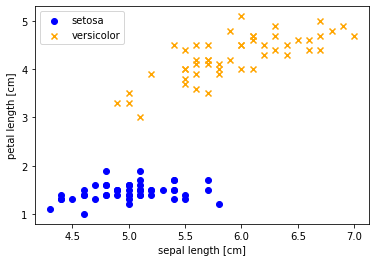

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)

X = df.iloc[:100, [0,2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='blue', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='orange', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='best')
plt.show()

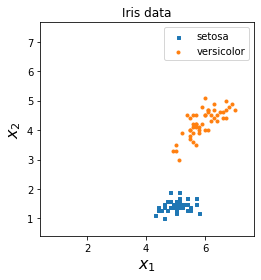

In [22]:
joy.plot_xyw(X, y, title='Iris data', classes=['setosa', 'versicolor'])

[5.471 2.862]
[0.63848179 1.44130358]


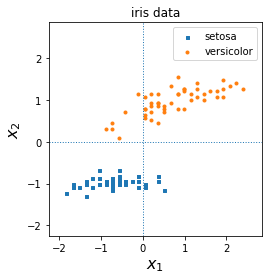

In [26]:
mu, sigma = X.mean(axis=0), X.std(axis=0)
print(mu)
print(sigma)
Xstd = (X - mu) / sigma
Xstd
joy.plot_xyw(Xstd, y, title='iris data', classes=['setosa','versicolor'])

## 2. AdalineGD 클래스 구현

이는 경사하강법을 사용하여 구현한 아달라인(Adaptive Linear Neuron) 이진 분류기를 구현한 클래스이며, 주요 메소드와 인자는 다음과 같습니다. 

- __init()__: Perceptron 클래스로 마찬가지로`__init()__`함수의 인자는 학습률 eta, 반복횟수 epochs, 난수시드 random_seed입니다. 인스턴스 생성할 때 인자로 전달할 수 있습니다. 

- __fit()__: 훈련자료로 가중치를 구하는 메소드입니다. 훈련자료 X와 클래스 레이블 y를 인자로 받습니다. 가중치 w를 선택적 인자로 받을 수 있으나, w를 인자를 설정하지 않으면, 작은 난수로 초기화됩니다.
    - 출력값 $\hat{y}$을 계산하는 방식이 Perceptron 클래스와 다른 점을 유의하십시오.  
    - 각 샘플마다 출력값 $\hat{y}$을 구하는 것이 아니라 모든 훈련자료를 for 루프없이 한번에 계산합니다. 각 훈련자료의 오차의 총합을 구하여, 이 오차를 줄이는 방향으로 가중치를 조정합니다. 결과적으로 epochs는 가중치가 조정되는 횟수입니다.  

- __net_input()__: 모든 훈련자료의 각 샘플과 가중치를 곱한 값의 총합 z를 계산합니다. 
- __activation()__: 활성화 함수 역활을 하는 메소드이지만, 여기서는 Identity(아이덴티티)함수를 사용함으로 계산에 아무런 아무 영향을 미치지 않습니다. 코드의 흐름 즉 개념을 보여주기 위해 구현해 둔 것입니다.  나중에 우리가 다룰 로지스틱 회귀를 구현할 때는 Identity함수 대신에 시그모이드 함수를 사용하기 위한 것입니다.  
- __predict()__: 노드(뉴론)의 출력값 즉 $\hat{y}$으로 클래스를 예측하는 메소드입니다. 


In [27]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
        eta: float, Learning rate (between 0.0 and 1.0)
        epochs: int, Passes over the training dataset.
        random_seed : int, Random number generator seed for reproducibility

    Attributes
        w_ : 1d-array, Weights after fitting.
        cost_ : list, Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta = 0.01, epochs = 10, random_seed = 1):
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed
    
    def fit(self, X, y):
        """ Fit training data.
        Parameters
            X: numpy.ndarray, shape=(n_samples, m_features), 
                Training vectors, where n_samples is the number of samples and
                n_features is the number of features.
            y : array-like, shape = [n_samples]
                Target values.
        Returns
            self : object
        """
        np.random.seed(self.random_seed)
        self.w = np.random.random(size = X.shape[1] + 1)   # bias 포함 self.w[0] 가 바이어스
        
        self.maxy, self.miny = y.max(), y.min()
        self.cost_ = []
        self.w_ = np.array([self.w])     #(1, X.shape[1]+1)로 변경
        
        for i in range(self.epochs):
            Z = self.net_input(X)
            yhat = self.activation(Z)
            errors = (y - yhat)
            self.w[1:] += self.eta*np.dot(errors, X)
            self.w[0] += self.eta*np.sum(errors)
            cost = 0.5*np.sum(errors**2)
            self.cost_.append(cost)
            self.w_ = np.vstack([self.w_, self.w])
        return self
    
    def net_input(self, X):
        """Compute the value of z, net input  """
        return np.dot(X, self.w[1:]) + self.w[0]
    
    def activation(self, X):  
        """Identity activation function: """
        return X

In [35]:
w = np.random.random(size = 785)
w_ = np.array([w])
w_.shape

(1, 785)